## References

Models converted from Shawwn's training [1] and Gwern's release [2]. 2D character picture (HatsuneMiku) is licensed under CC BY-NC by piapro [3].

- [1] Shawwn, The model is trained based on his fork of google's 'compare_gan', https://github.com/shawwn/compare_gan/
- [2] Gwern, "A prototype anime BigGAN 256px trained on Danbooru2019+e621 for 600k iterations is now available for download", https://www.gwern.net/Faces#danbooru2019e621-256px-biggan
- [3] "For Creators", http://piapro.net/en_for_creators.html

## 开始 Begin

记得给我点星星啦！ [我的仓库](https://www.github.com/HighCWu/anime_biggan_toy)

If you like my repo, star it. [My repo](https://www.github.com/HighCWu/anime_biggan_toy)

这个Notebook仅作展示用，我的仓库里有更多相关内容。

This notebook is for display purposes only, there are more related content in my repo.

欢迎来我的Q群玩耍：1044867291

In [ ]:
# 解压预训练模型 Unzip Pretrained Model
!unzip data/data49029/anime-biggan.zip -d data/

Archive:  data/data49029/anime-biggan.zip
  inflating: data/anime-biggan-256px-run39-607250.generator.pdparams  
  inflating: data/anime-biggan-256px-run39-607250.discriminator.pdparams  


In [1]:
# 加载模型 Load Model
from networks import model_cache, load_G, load_D
from networks import std_gen, std_gen_interpolate
from networks import trunc_gen, trunc_gen_interpolate
from networks import std_enc, std_enc_with_D
load_G('data/anime-biggan-256px-run39-607250.generator')

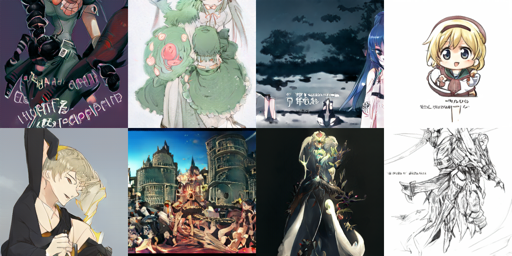

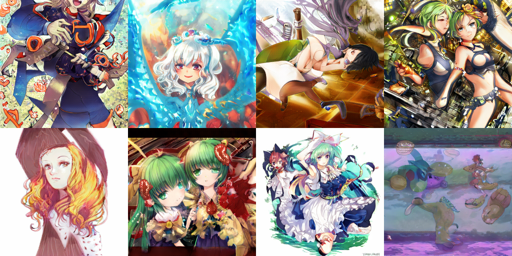

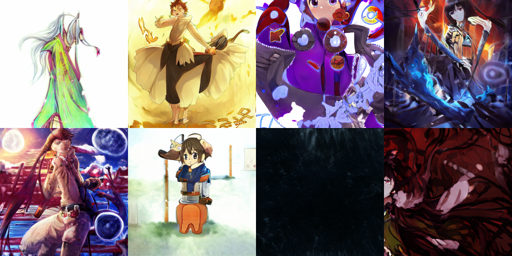

In [ ]:
# 运行模型的标准生成输出过程 Run Output Process of Model's Standard Generation 
import numpy as np
from PIL import Image
from IPython.display import display

def concat_imgs_bsz8(imgs):
    np_imgs = [np.asarray(img) for img in imgs]
    img1 = np.concatenate(np_imgs[:4], 1)
    img2 = np.concatenate(np_imgs[4:], 1)
    img = Image.fromarray(np.concatenate([img1, img2], 0))
    return img.resize([img.size[0]//2, img.size[1]//2])

imgs = std_gen(8, seed=233)
for i, img in enumerate(imgs):
    img.save(f'data/std_seed233_{str(i).zfill(3)}.png')
display(concat_imgs_bsz8(imgs))

imgs = std_gen(8, seed=None)
for i, img in enumerate(imgs):
    img.save(f'data/std_seed233_{str(i+8).zfill(3)}.png')
display(concat_imgs_bsz8(imgs))

imgs = std_gen(8, seed=234) # 不同的seed不同的结果 Different seed with different result
for i, img in enumerate(imgs):
    img.save(f'data/std_seed234_{str(i).zfill(3)}.png')
display(concat_imgs_bsz8(imgs))

In [ ]:
# 运行模型的标准生成动图输出过程 Run Gif Output Process of Model's Standard Generation 
from IPython.display import display, HTML

def display_mp4(path):
    print(f'Read from {path}')
    from base64 import b64encode
    mp4 = open(path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    display(HTML("""
    <video controls loop autoplay>
        <source src="%s" type="video/mp4">
    </video>
    """ % data_url))
    print('Display finished.')

std_gen_interpolate(8, seed=233, out_path='data/std_out1', interpolate_mode=1)
std_gen_interpolate(8, seed=None, out_path='data/std_out2', interpolate_mode=0)
std_gen_interpolate(8, seed=234, out_path='data/std_out3', interpolate_mode=1) # 不同的seed不同的结果 Different seed with different result

2/320
320/320
320/320
320/320


In [ ]:
# display(HTML('<img src="data/std_out1.gif">'))
# display(HTML('<img src="data/std_out2.gif">'))
# display(HTML('<img src="data/std_out3.gif">'))

# display_mp4("data/std_out1.mp4")
display_mp4("data/std_out2.mp4")
# display_mp4("data/std_out3.mp4")

Read from data/std_out2.mp4


Display finished.


In [ ]:
# 运行模型的标准生成分层插值动图输出过程 Run Gif Output Process of Model's Standard Generation 
from IPython.display import display, HTML

def display_mp4(path):
    print(f'Read from {path}')
    from base64 import b64encode
    mp4 = open(path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    display(HTML("""
    <video controls loop autoplay>
        <source src="%s" type="video/mp4">
    </video>
    """ % data_url))
    print('Display finished.')

std_gen_interpolate(8, seed=2333, out_path='data/std_inter1', levels="z11;z12")
std_gen_interpolate(8, seed=2333, out_path='data/std_inter2', levels="z21;z22")
std_gen_interpolate(8, seed=2333, out_path='data/std_inter3', levels="z31;z32")
std_gen_interpolate(8, seed=2333, out_path='data/std_inter4', levels="z41;z42")
std_gen_interpolate(8, seed=2333, out_path='data/std_inter5', levels="z51;z52")
std_gen_interpolate(8, seed=2333, out_path='data/std_inter6', levels="z61;z62")

2/320
320/320
320/320
320/320
320/320
320/320
320/320


In [ ]:
# display(HTML('<img src="data/std_inter1.gif">'))
# display(HTML('<img src="data/std_inter2.gif">'))
# display(HTML('<img src="data/std_inter3.gif">'))
# display(HTML('<img src="data/std_inter4.gif">'))
# display(HTML('<img src="data/std_inter5.gif">'))
# display(HTML('<img src="data/std_inter6.gif">'))

# display_mp4("data/std_inter1.mp4")
# display_mp4("data/std_inter2.mp4")
# display_mp4("data/std_inter3.mp4")
display_mp4("data/std_inter4.mp4")
# display_mp4("data/std_inter5.mp4")
# display_mp4("data/std_inter6.mp4")

Read from data/std_inter4.mp4


Display finished.


## 截断采样方法 Truncnorm Sample

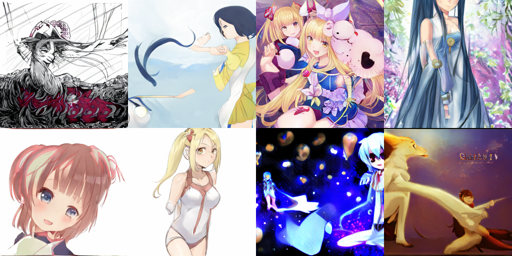

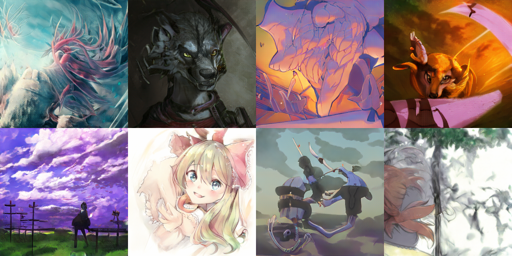

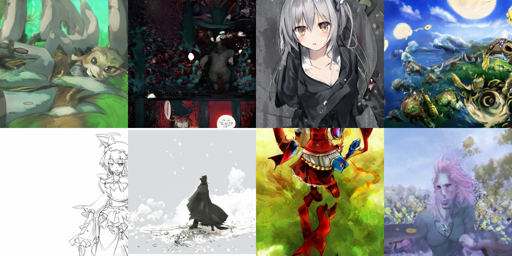

In [6]:
# 运行模型的标准生成输出过程 Run Output Process of Model's Standard Generation 
import numpy as np
from PIL import Image
from IPython.display import display

def concat_imgs_bsz8(imgs):
    np_imgs = [np.asarray(img) for img in imgs]
    img1 = np.concatenate(np_imgs[:4], 1)
    img2 = np.concatenate(np_imgs[4:], 1)
    img = Image.fromarray(np.concatenate([img1, img2], 0))
    return img.resize([img.size[0]//2, img.size[1]//2])

imgs = trunc_gen(8, trunc_range=(-2,2), truncation=1.0, seed=233)
for i, img in enumerate(imgs):
    img.save(f'data/trunc_seed233_{str(i).zfill(3)}.png')
display(concat_imgs_bsz8(imgs))

imgs = trunc_gen(8, trunc_range=(-2,2), truncation=1.0, seed=None)
for i, img in enumerate(imgs):
    img.save(f'data/trunc_seed233_{str(i+8).zfill(3)}.png')
display(concat_imgs_bsz8(imgs))

imgs = trunc_gen(8, trunc_range=(-2,2), truncation=1.0, seed=234) # 不同的seed不同的结果 Different seed with different result
for i, img in enumerate(imgs):
    img.save(f'data/trunc_seed234_{str(i).zfill(3)}.png')
display(concat_imgs_bsz8(imgs))

In [ ]:
# 运行模型的标准生成动图输出过程 Run Gif Output Process of Model's Standard Generation 
from IPython.display import display, HTML

def display_mp4(path):
    print(f'Read from {path}')
    from base64 import b64encode
    mp4 = open(path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    display(HTML("""
    <video controls loop autoplay>
        <source src="%s" type="video/mp4">
    </video>
    """ % data_url))
    print('Display finished.')

trunc_gen_interpolate(8, trunc_range=(-2,2), truncation=1.0, seed=233, out_path='data/trunc_out1', interpolate_mode=1)
trunc_gen_interpolate(8, trunc_range=(-2,2), truncation=1.0, seed=None, out_path='data/trunc_out2', interpolate_mode=0)
trunc_gen_interpolate(8, trunc_range=(-2,2), truncation=1.0, seed=234, out_path='data/trunc_out3', interpolate_mode=1) # 不同的seed不同的结果 Different seed with different result

2/320
320/320
320/320
320/320


In [ ]:
# display(HTML('<img src="data/trunc_out1.gif">'))
# display(HTML('<img src="data/trunc_out2.gif">'))
# display(HTML('<img src="data/trunc_out3.gif">'))

# display_mp4("data/trunc_out1.mp4")
display_mp4("data/trunc_out2.mp4")
# display_mp4("data/trunc_out3.mp4")

Read from data/trunc_out2.mp4


Display finished.


In [7]:
# 运行模型的标准生成分层插值动图输出过程 Run Gif Output Process of Model's Standard Generation 
from IPython.display import display, HTML

def display_mp4(path):
    print(f'Read from {path}')
    from base64 import b64encode
    mp4 = open(path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    display(HTML("""
    <video controls loop autoplay>
        <source src="%s" type="video/mp4">
    </video>
    """ % data_url))
    print('Display finished.')

trunc_gen_interpolate(8, trunc_range=(-2,2), truncation=1.0, seed=2333, out_path='data/trunc_inter1', levels="z11;z12")
trunc_gen_interpolate(8, trunc_range=(-2,2), truncation=1.0, seed=2333, out_path='data/trunc_inter2', levels="z21;z22")
trunc_gen_interpolate(8, trunc_range=(-2,2), truncation=1.0, seed=2333, out_path='data/trunc_inter3', levels="z31;z32")
trunc_gen_interpolate(8, trunc_range=(-2,2), truncation=1.0, seed=2333, out_path='data/trunc_inter4', levels="z41;z42")
trunc_gen_interpolate(8, trunc_range=(-2,2), truncation=1.0, seed=2333, out_path='data/trunc_inter5', levels="z51;z52")
trunc_gen_interpolate(8, trunc_range=(-2,2), truncation=1.0, seed=2333, out_path='data/trunc_inter6', levels="z61;z62")

2/320
320/320
320/320
320/320
320/320
320/320
320/320


In [8]:
# display(HTML('<img src="data/trunc_inter1.gif">'))
# display(HTML('<img src="data/trunc_inter2.gif">'))
# display(HTML('<img src="data/trunc_inter3.gif">'))
# display(HTML('<img src="data/trunc_inter4.gif">'))
# display(HTML('<img src="data/trunc_inter5.gif">'))
# display(HTML('<img src="data/trunc_inter6.gif">'))

# display_mp4("data/trunc_inter1.mp4")
# display_mp4("data/trunc_inter2.mp4")
# display_mp4("data/trunc_inter3.mp4")
display_mp4("data/trunc_inter4.mp4")
# display_mp4("data/trunc_inter5.mp4")
# display_mp4("data/trunc_inter6.mp4")

Read from data/trunc_inter4.mp4


Display finished.


## 尝试编码已存在的图像 Try to encode image
BigGAN没有StyleGAN那么丰富的输入，所以这种尝试的结果是失败。
BigGAN does not have as rich input as StyleGAN, so this attempt failed.

loss: 0.08211489766836166  2/2000
loss: 0.037693750113248825  2000/2000


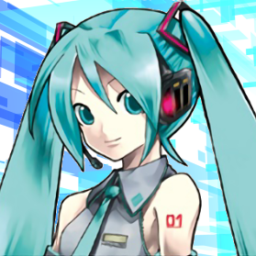

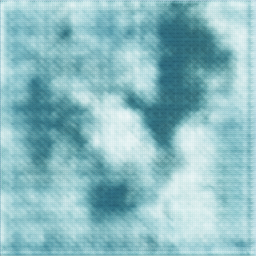

In [ ]:
from IPython.display import display

dec, img = std_enc(path='miku.png', steps=2000, lr=4e-3)
display(img)
display(dec)

In [ ]:
load_D('data/anime-biggan-256px-run39-607250.discriminator')

loss: 190.2445831298828  2/2000
loss: 101.98069763183594  2000/2000


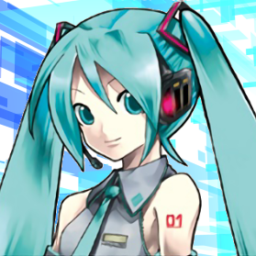

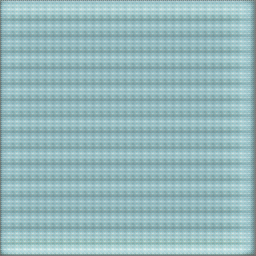

In [ ]:
from IPython.display import display

dec, img = std_enc_with_D(path='miku.png', steps=2000, lr=1e-3, levels=[1,2], weights=[100,1])
display(img)
display(dec)